In [72]:

!pip install jupyter_black
%load_ext jupyter_black
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from transformers import AutoModelForSequenceClassification
# from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification
pd.set_option("max_colwidth", 200)

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [73]:
df = pd.read_csv("All_Beauty_chunk_250.csv")
df = df[["text","rating"]]
df["text"] = df["text"].replace(r"\n", " ", regex=True)
df.head()

,text,rating
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0
2,"Smells good, feels great!",5.0
3,Felt synthetic,1.0
4,Love it,5.0


In [74]:
df["rating_sentiment"] = df["rating"]
df.head()

,text,rating,rating_sentiment
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,5.0
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,4.0
2,"Smells good, feels great!",5.0,5.0
3,Felt synthetic,1.0,1.0
4,Love it,5.0,5.0


In [75]:

df['rating_sentiment'] = df['rating'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
df.head()

,text,rating,rating_sentiment
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive
2,"Smells good, feels great!",5.0,Positive
3,Felt synthetic,1.0,Negative
4,Love it,5.0,Positive


In [76]:
df["roberta_content"] = df["text"]
df.head()

,text,rating,rating_sentiment,roberta_content
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med..."
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri..."
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!"
3,Felt synthetic,1.0,Negative,Felt synthetic
4,Love it,5.0,Positive,Love it


In [77]:
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)
def sentiment_analyser(text,model):
  encoded_input = tokenizer(text, return_tensors="pt")
  #,truncation=True, padding='max_length', max_length=max_length
  output = roberta_model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = np.round(softmax(scores), 2)
  scores_dict = {"neg": scores[0],
                "neu": scores[1],
                "pos": scores[2]}
  return scores_dict

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [78]:
%%time
# apply the roberta function
df["probabilities"] = df["roberta_content"].apply(sentiment_analyser, model=roberta_model)
df.head()

CPU times: user 1min 43s, sys: 134 ms, total: 1min 43s
Wall time: 1min 44s


,text,rating,rating_sentiment,roberta_content,probabilities
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...","{'neg': 0.02, 'neu': 0.06, 'pos': 0.92}"
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...","{'neg': 0.57, 'neu': 0.3, 'pos': 0.12}"
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!","{'neg': 0.01, 'neu': 0.01, 'pos': 0.98}"
3,Felt synthetic,1.0,Negative,Felt synthetic,"{'neg': 0.48, 'neu': 0.43, 'pos': 0.09}"
4,Love it,5.0,Positive,Love it,"{'neg': 0.02, 'neu': 0.1, 'pos': 0.89}"


In [79]:

probabilities = df["probabilities"].apply(pd.Series)
df = df.join(probabilities)
df = df.drop("probabilities", axis=1)
df.head()

,text,rating,rating_sentiment,roberta_content,neg,neu,pos
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",0.02,0.06,0.92
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",0.57,0.30,0.12
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!",0.01,0.01,0.98
3,Felt synthetic,1.0,Negative,Felt synthetic,0.48,0.43,0.09
4,Love it,5.0,Positive,Love it,0.02,0.10,0.89


In [80]:

polarity_weights = torch.tensor([-1, 0, 1])
probs = torch.tensor(df[["neg", "neu", "pos"]].values)
polarity = polarity_weights * probs
polarity = polarity.sum(dim=-1)
polarity_scaled = nn.Tanh()(polarity)
df["roberta_polarity"] = polarity_scaled.numpy()
df["roberta_sentiment"] = pd.cut(
    df["roberta_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)
df = df.drop(["neu", "neg", "pos"], axis=1)
df.head()

,text,rating,rating_sentiment,roberta_content,roberta_polarity,roberta_sentiment
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",0.716298,Positive
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",-0.421899,Negative
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!",0.748704,Positive
3,Felt synthetic,1.0,Negative,Felt synthetic,-0.371360,Negative
4,Love it,5.0,Positive,Love it,0.701374,Positive


In [81]:

df["vader_content"] = df["text"]
df["vader_content"] = df["vader_content"].replace(r"#", "", regex=True)
df.head()

,text,rating,rating_sentiment,roberta_content,roberta_polarity,roberta_sentiment,vader_content
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",0.716298,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med..."
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",-0.421899,Negative,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri..."
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!",0.748704,Positive,"Smells good, feels great!"
3,Felt synthetic,1.0,Negative,Felt synthetic,-0.371360,Negative,Felt synthetic
4,Love it,5.0,Positive,Love it,0.701374,Positive,Love it


In [82]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
%%time
vader_model = SentimentIntensityAnalyzer()
df["vader_scores"] = df["vader_content"].apply(
    lambda text: vader_model.polarity_scores(text)
)
print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 250
CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 267 ms


,text,rating,rating_sentiment,roberta_content,roberta_polarity,roberta_sentiment,vader_content,vader_scores
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",0.716298,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...","{'neg': 0.062, 'neu': 0.745, 'pos': 0.193, 'compound': 0.8162}"
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",-0.421899,Negative,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...","{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.743}"
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!",0.748704,Positive,"Smells good, feels great!","{'neg': 0.0, 'neu': 0.215, 'pos': 0.785, 'compound': 0.807}"
3,Felt synthetic,1.0,Negative,Felt synthetic,-0.371360,Negative,Felt synthetic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,Love it,5.0,Positive,Love it,0.701374,Positive,Love it,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}"


In [84]:

df["vader_polarity"] = df["vader_scores"].apply(
    lambda score_dict: score_dict["compound"]
)

df["vader_sentiment"] = pd.cut(
    df["vader_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)
df.head()

,text,rating,rating_sentiment,roberta_content,roberta_polarity,roberta_sentiment,vader_content,vader_scores,vader_polarity,vader_sentiment
0,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",5.0,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...",0.716298,Positive,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, med...","{'neg': 0.062, 'neu': 0.745, 'pos': 0.193, 'compound': 0.8162}",0.8162,Positive
1,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",4.0,Positive,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...",-0.421899,Negative,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was descri...","{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.743}",0.7430,Positive
2,"Smells good, feels great!",5.0,Positive,"Smells good, feels great!",0.748704,Positive,"Smells good, feels great!","{'neg': 0.0, 'neu': 0.215, 'pos': 0.785, 'compound': 0.807}",0.8070,Positive
3,Felt synthetic,1.0,Negative,Felt synthetic,-0.371360,Negative,Felt synthetic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
4,Love it,5.0,Positive,Love it,0.701374,Positive,Love it,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}",0.6369,Positive


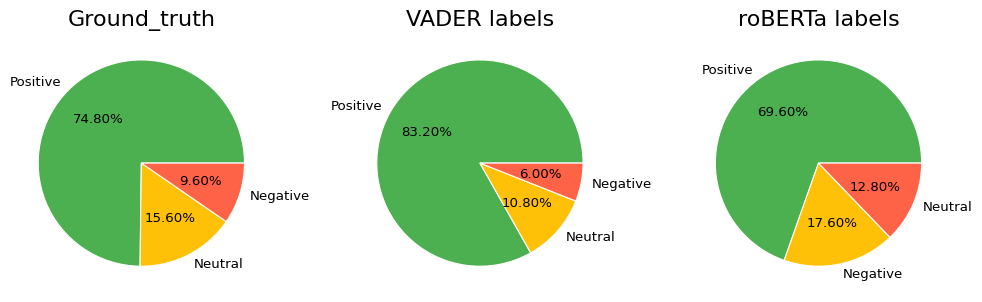

In [110]:

plt.figure(figsize=(10, 5))
colors = ["#4CAF50", "#FFC107", "#FF6347"]

plt.subplot(1, 3, 1)  # Subplot 1
df["rating_sentiment"].value_counts().plot(
    kind="pie",
    autopct="%.2f%%",
    colors=colors,
    **{
        "textprops": {
            "fontsize":42,
            "font": "Arial",
            "fontstyle": "normal",
            # "weight": "bold",
            "color": "black",
        }
    }
)
plt.legend().remove()
plt.title(
    "Ground_truth",
    fontsize=16,
    color="black",
)
plt.ylabel("")

plt.subplot(1, 3, 2)  # Subplot 2
df['vader_sentiment'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=colors,
    **{
        "textprops": {
            "fontsize": 42,
            "font": "Arial",
            "fontstyle": "normal",
            # "weight": "bold",
            "color": "black",
        }
    }
)
plt.legend().remove()
plt.title(
    "VADER labels",
    fontsize=16,
    color="black",
)
plt.ylabel("")

plt.subplot(1, 3, 3)  # Subplot 3 (Corrected index)
df["roberta_sentiment"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.2f%%",
    colors=colors,
    textprops={
        "fontsize": 42,
        "font": "Arial",
        "fontstyle": "normal",
        # "weight": "bold",
        "color": "black",
    }
)
plt.legend().remove()
plt.title("roBERTa labels", fontsize=16, color="black")
plt.ylabel("")

plt.tight_layout()
plt.show()


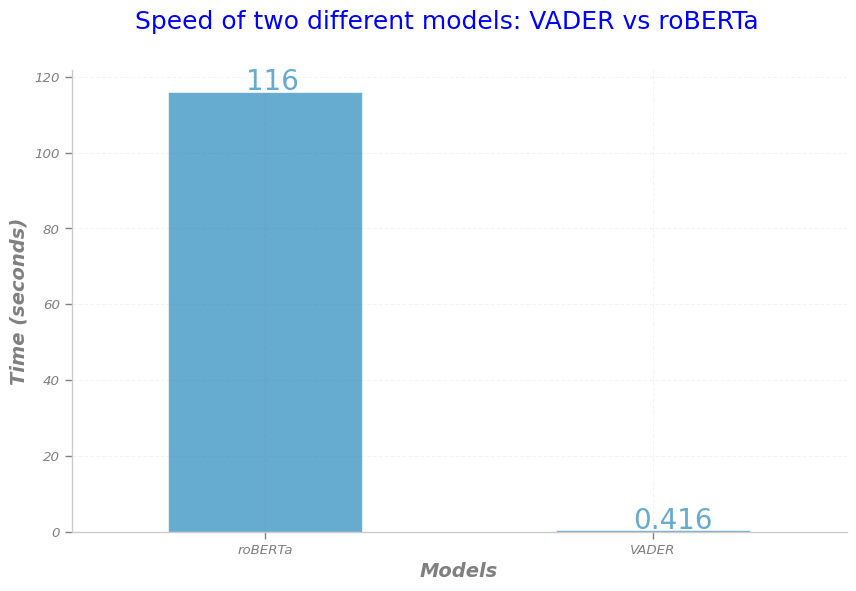

In [87]:
pd.DataFrame({"model": ["roBERTa", "VADER"], "Prediction Time": [104, 0.267]}).plot(
    kind="bar", figsize=(10, 6), alpha=0.6, color="b"
)
sns.despine(right=True, top=True)
plt.tick_params(
    reset=True,
    top=False,
    right=False,
    color="gray",
    labelcolor="gray",
    grid_alpha=0.2,
    grid_linestyle="--",
)
plt.xticks(
    range(2),
    ["roBERTa", "VADER"],
    **{"fontsize": 14, "font": "Arial", "fontstyle": "italic"},
)
plt.yticks(**{"fontsize": 14, "font": "Arial", "fontstyle": "italic"})
plt.xlabel(
    "Models",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.ylabel(
    "Time (seconds)",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.legend("", frameon=False)
plt.suptitle(
    "Speed of two different models: VADER vs roBERTa",
    fontsize=18,
    color="blue",
)
for index, data in enumerate([116, 0.416]):
    plt.text(
        x=index - 0.05,
        y=data + 0.5,
        s=f"{data}",
        fontdict=dict(fontsize=20, color="b", alpha=0.6),
    )
plt.show()